Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.signal import savgol_filter

Load the FTIR data

In [3]:
file_path = r"C:\Users\Abdul\OneDrive - Chulalongkorn University\fadhli nitip\csv\data_rt4_countrybased_raw_nodrop.csv"  # Update with your file path
ftir_data = pd.read_csv(file_path)

In [5]:
ftir_data.head()

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.000788,0.000813,0.000840,0.000858,0.000862,0.000843,...,0.011951,0.013370,0.014849,0.016154,0.017089,0.017538,0.017469,0.016946,0.016094,NaN
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.001095,0.001078,0.001086,0.001114,0.001151,0.001180,...,0.012086,0.011914,0.011799,0.011801,0.011938,0.012208,0.012600,0.013097,0.013664,NaN
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.000099,0.000153,0.000288,0.000470,0.000658,0.000814,...,0.010487,0.011307,0.012372,0.013532,0.014614,0.015469,0.015986,0.016134,0.015954,NaN
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.001685,0.001802,0.001903,0.001975,0.002017,0.002031,...,0.008177,0.008240,0.008484,0.008982,0.009749,0.010722,0.011752,0.012653,0.013254,NaN
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.002118,0.002196,0.002266,0.002324,0.002369,0.002404,...,0.009831,0.010143,0.010621,0.011171,0.011728,0.012274,0.012824,0.013402,0.014003,NaN


In [7]:
ftir_data.describe(include='all')

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
count,447,447.000000,447,447,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,0.0
unique,25,NaN,3,447,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SNI,NaN,TH,ID-BBX-068-2307-031_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,NaN,361,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.221477,NaN,NaN,0.001279,0.001277,0.001277,0.001279,0.001286,0.001295,...,0.013692,0.013742,0.013847,0.013990,0.014141,0.014272,0.014354,0.014376,0.014337,NaN
std,NaN,0.480736,NaN,NaN,0.003983,0.003994,0.004009,0.004027,0.004048,0.004069,...,0.007954,0.007918,0.007826,0.007695,0.007549,0.007409,0.007291,0.007197,0.007127,NaN
min,NaN,0.000000,NaN,NaN,-0.053471,-0.053662,-0.053772,-0.053781,-0.053690,-0.053514,...,-0.099484,-0.098245,-0.095699,-0.092164,-0.088132,-0.084153,-0.080762,-0.078322,-0.076966,NaN
25%,NaN,0.000000,NaN,NaN,0.000008,0.000003,-0.000031,-0.000043,-0.000054,-0.000095,...,0.011937,0.012015,0.012305,0.012495,0.012564,0.012654,0.012732,0.012631,0.012610,NaN
50%,NaN,0.000000,NaN,NaN,0.001300,0.001353,0.001358,0.001390,0.001402,0.001363,...,0.014184,0.014284,0.014285,0.014418,0.014661,0.014679,0.014842,0.014915,0.014868,NaN
75%,NaN,0.000000,NaN,NaN,0.002414,0.002380,0.002389,0.002382,0.002427,0.002439,...,0.016450,0.016250,0.016455,0.016583,0.016644,0.016838,0.016899,0.016996,0.017127,NaN


In [8]:
ftir_data.isnull().sum()

prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64

In [9]:
duplicates = ftir_data[ftir_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [prov_char, country_code, country_char, wavenumber, 4000.122, 3999.64, 3999.158, 3998.676, 3998.194, 3997.712, 3997.23, 3996.747, 3996.265, 3995.783, 3995.301, 3994.819, 3994.337, 3993.855, 3993.373, 3992.891, 3992.408, 3991.926, 3991.444, 3990.962, 3990.48, 3989.998, 3989.516, 3989.034, 3988.551, 3988.069, 3987.587, 3987.105, 3986.623, 3986.141, 3985.659, 3985.177, 3984.695, 3984.212, 3983.73, 3983.248, 3982.766, 3982.284, 3981.802, 3981.32, 3980.838, 3980.356, 3979.873, 3979.391, 3978.909, 3978.427, 3977.945, 3977.463, 3976.981, 3976.499, 3976.016, 3975.534, 3975.052, 3974.57, 3974.088, 3973.606, 3973.124, 3972.642, 3972.16, 3971.677, 3971.195, 3970.713, 3970.231, 3969.749, 3969.267, 3968.785, 3968.303, 3967.82, 3967.338, 3966.856, 3966.374, 3965.892, 3965.41, 3964.928, 3964.446, 3963.964, 3963.481, 3962.999, 3962.517, 3962.035, 3961.553, 3961.071, 3960.589, 3960.107, 3959.624, 3959.142, 3958.66, 3958.178, 3957.696, 3957.214, 3956.732, 3956.25

In [12]:
ftir_data.drop(columns=['16158804.55800001'], inplace=True)

In [21]:
ftir_data.describe(include='all')

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,654.232,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893
count,447,447.000000,447,447,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
unique,25,NaN,3,447,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SNI,NaN,TH,ID-BBX-068-2307-031_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,NaN,361,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.221477,NaN,NaN,0.001279,0.001277,0.001277,0.001279,0.001286,0.001295,...,0.013703,0.013692,0.013742,0.013847,0.013990,0.014141,0.014272,0.014354,0.014376,0.014337
std,NaN,0.480736,NaN,NaN,0.003983,0.003994,0.004009,0.004027,0.004048,0.004069,...,0.007933,0.007954,0.007918,0.007826,0.007695,0.007549,0.007409,0.007291,0.007197,0.007127
min,NaN,0.000000,NaN,NaN,-0.053471,-0.053662,-0.053772,-0.053781,-0.053690,-0.053514,...,-0.099327,-0.099484,-0.098245,-0.095699,-0.092164,-0.088132,-0.084153,-0.080762,-0.078322,-0.076966
25%,NaN,0.000000,NaN,NaN,0.000008,0.000003,-0.000031,-0.000043,-0.000054,-0.000095,...,0.012128,0.011937,0.012015,0.012305,0.012495,0.012564,0.012654,0.012732,0.012631,0.012610
50%,NaN,0.000000,NaN,NaN,0.001300,0.001353,0.001358,0.001390,0.001402,0.001363,...,0.014232,0.014184,0.014284,0.014285,0.014418,0.014661,0.014679,0.014842,0.014915,0.014868
75%,NaN,0.000000,NaN,NaN,0.002414,0.002380,0.002389,0.002382,0.002427,0.002439,...,0.016406,0.016450,0.016250,0.016455,0.016583,0.016644,0.016838,0.016899,0.016996,0.017127


In [22]:
ftir_data.describe()

,country_code,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,3997.23,3996.747,3996.265,...,654.232,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,0.221477,0.001279,0.001277,0.001277,0.001279,0.001286,0.001295,0.001307,0.001321,0.001334,...,0.013703,0.013692,0.013742,0.013847,0.013990,0.014141,0.014272,0.014354,0.014376,0.014337
std,0.480736,0.003983,0.003994,0.004009,0.004027,0.004048,0.004069,0.004085,0.004094,0.004091,...,0.007933,0.007954,0.007918,0.007826,0.007695,0.007549,0.007409,0.007291,0.007197,0.007127
min,0.000000,-0.053471,-0.053662,-0.053772,-0.053781,-0.053690,-0.053514,-0.053281,-0.053023,-0.052768,...,-0.099327,-0.099484,-0.098245,-0.095699,-0.092164,-0.088132,-0.084153,-0.080762,-0.078322,-0.076966
25%,0.000000,0.000008,0.000003,-0.000031,-0.000043,-0.000054,-0.000095,-0.000080,-0.000005,0.000052,...,0.012128,0.011937,0.012015,0.012305,0.012495,0.012564,0.012654,0.012732,0.012631,0.012610
50%,0.000000,0.001300,0.001353,0.001358,0.001390,0.001402,0.001363,0.001341,0.001341,0.001337,...,0.014232,0.014184,0.014284,0.014285,0.014418,0.014661,0.014679,0.014842,0.014915,0.014868
75%,0.000000,0.002414,0.002380,0.002389,0.002382,0.002427,0.002439,0.002484,0.002551,0.002558,...,0.016406,0.016450,0.016250,0.016455,0.016583,0.016644,0.016838,0.016899,0.016996,0.017127
max,2.000000,0.019997,0.020251,0.020727,0.021413,0.022238,0.023088,0.023817,0.024292,0.024421,...,0.027676,0.027743,0.027998,0.028441,0.029035,0.029704,0.030349,0.030858,0.031145,0.031169


In [23]:
ftir_data.isna().sum()

prov_char       0
country_code    0
country_char    0
wavenumber      0
4000.122        0
               ..
651.822         0
651.34          0
650.858         0
650.376         0
649.893         0
Length: 6954, dtype: int64

c:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


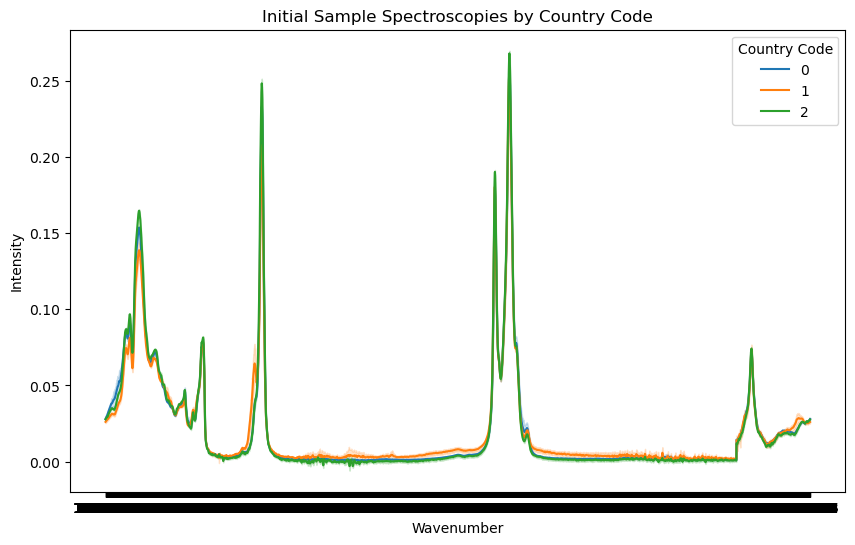

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'wavenumber', 'prov_char' and 'country_char' columns with strings that should be ignored
# to visualize spectroscopy data by 'country_code', excluding these character columns

# Exclude 'prov_char' and 'country_char' from the spectroscopy data columns
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char','wavenumber'])

# Melting the DataFrame to have a long format suitable for seaborn's lineplot
melted_ftir_data = ftir_data.melt(id_vars='country_code', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='country_code', palette='tab10')
plt.title('Initial Sample Spectroscopies by Country Code')
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.legend(title='Country Code')
plt.show()